In [1]:
# Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import the data

In [4]:
air = pd.read_excel("D:\Data science\Assignments docs\Clustering\EastWestAir.xlsx")
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
air.shape

(3999, 12)

In [6]:
air.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
air.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [8]:
# summarize the number of unique values in each column

In [9]:
print(air.nunique())

ID#                  3999
Balance              3904
Qual_miles            164
cc1_miles               5
cc2_miles               3
cc3_miles               5
Bonus_miles          2734
Bonus_trans            57
Flight_miles_12mo     343
Flight_trans_12        35
Days_since_enroll    2820
Award?                  2
dtype: int64


In [10]:
# Normalizing or standardizing the data

In [11]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [12]:
df_norm = norm_func(air.iloc[:, 1:])
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


# Hierarchial Clustering

In [13]:
# Importing necessary libraries

In [14]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch

In [15]:
type(df_norm)

pandas.core.frame.DataFrame

In [16]:
# Building hierarchial clustering dendrogram using different linkges 

In [17]:
# Using complete linkage and euclidean method

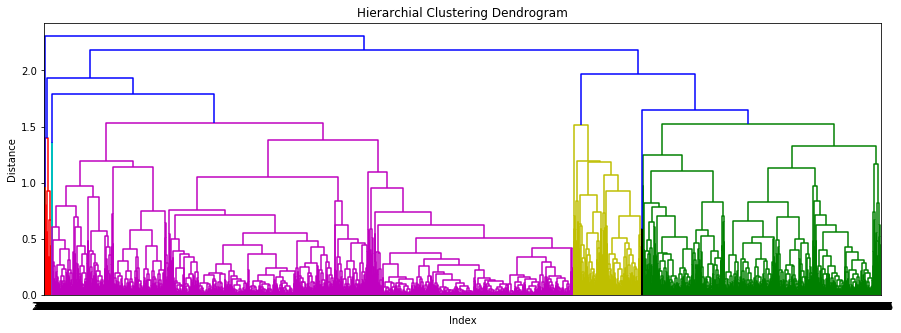

In [18]:
z=linkage(df_norm, method="complete", metric="euclidean")
plt.figure(figsize=(15,5));plt.title("Hierarchial Clustering Dendrogram");plt.xlabel("Index");plt.ylabel("Distance")
sch.dendrogram(
    z,
    leaf_rotation=0.,
    leaf_font_size=10.,
)
plt.show()

In [19]:
# Dendrogram of complete method is very clumsy, hence it is difficult to select number of clusters

In [20]:
# Using ward linkage and euclidean method

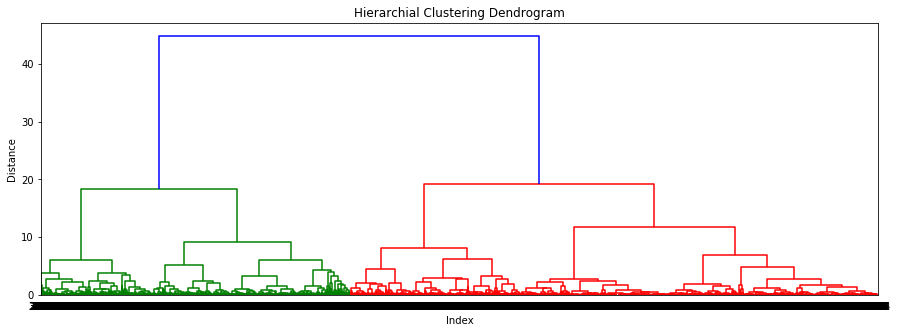

In [21]:
z=linkage(df_norm, method="ward", metric="euclidean")
plt.figure(figsize=(15,5));plt.title("Hierarchial Clustering Dendrogram");plt.xlabel("Index");plt.ylabel("Distance")
sch.dendrogram(
    z,
    leaf_rotation=0.,
    leaf_font_size=10.,
)
plt.show()

In [22]:
# Dendrogram of ward method is very clumsy at lower distances, but 4 clusters can be found at distance 18

In [23]:
# Considering the "ward" linkage cluster dendrogram, the distinctive clusters formed are 4.

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
h_complete = AgglomerativeClustering(n_clusters=4, linkage="ward",affinity="euclidean").fit(df_norm)

In [26]:
cluster_labels= pd.Series(h_complete.labels_)
cluster_labels

0       0
1       0
2       0
3       0
4       3
       ..
3994    1
3995    1
3996    1
3997    0
3998    0
Length: 3999, dtype: int64

In [27]:
# creating a  new column and assigning the cluster labels

In [28]:
air["clust"]=cluster_labels
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [29]:
import seaborn as sns

In [30]:
# Value count of each cluster

In [31]:
air.clust.value_counts()      

0    1710
1     946
2     808
3     535
Name: clust, dtype: int64

In [32]:
# Cluster 0 has the highest no. of observations and cluster 3 has least no. of observations

In [33]:
# Aggregate mean of each cluster

In [34]:
air.iloc[:,1:].groupby(air.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
clust,,,,,,,,,,,,
0,37876.890058,52.797076,1.000000,1.019883,1.000585,2558.508187,5.730994,239.314035,0.697076,3562.376608,0.0,0.0
1,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0,1.0
2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0,2.0
3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0,3.0


In [35]:
# Observations
# The 0th cluster is the cluster with non frequent fliers, who are relatively new with low balance and bonus miles. 
# The 3rd cluster is the cluster with frequent fliers, who are relatively old with both high balance and bonus miles.
# The 1st and 2nd cluster categorizes customers between cluster 0 and 3.

# K Means clustering

In [36]:
# Importing necessary libraries

In [37]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [38]:
# screw plot or elbow curve

In [39]:
k = list(range(2,15))                 # Specifying the range of k for which the plot is to be created

In [40]:
TWSS=[]
for i in k:
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    WSS=[]                                   # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x209da484808>,
 <a list of 13 Text xticklabel objects>)

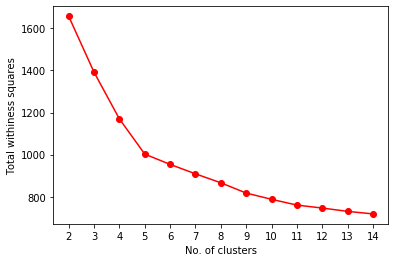

In [41]:
plt.plot(k,TWSS,"ro-");plt.xlabel("No. of clusters");plt.ylabel("Total withiness squares");plt.xticks(k)

In [42]:
# from above scree plot it is observed that the elbow of the curve is at 5 clusters, after which the TWSS variation is low

In [43]:
# Building KMeans model for 5 clusters

In [44]:
model = KMeans(n_clusters=5)

In [45]:
model.fit(df_norm)

KMeans(n_clusters=5)

In [46]:
model.labels_                # getting the labels of clusters assigned to each row 

array([2, 2, 2, ..., 3, 0, 0])

In [47]:
md = pd.Series(model.labels_)           # converting numpy array into pandas series object
air["kclust"]= md                        # creating a  new column and assigning labels to it 

In [48]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust,kclust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3,3


In [49]:
air.kclust.value_counts()         # Value counts of different clusters

0    1032
2     868
3     808
1     673
4     618
Name: kclust, dtype: int64

In [50]:
# Cluster 1 has the highest no. of observations and cluster 4 has least no. of  observations

In [51]:
# Checking aggregate mean of each cluster

In [52]:
air.iloc[:,1:12].groupby(air.kclust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
kclust,,,,,,,,,,,
0,33097.301357,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
1,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
2,49921.633641,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0
3,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
4,118297.325243,73.467638,3.584142,1.001618,1.022654,31384.393204,17.233010,224.100324,0.627832,4419.553398,0.0


In [53]:
# Observations
# The 1st cluster is the cluster with non frequent fliers, who are relatively new with low balance and bonus miles.
# The 4th cluster is the cluster with frequent fliers, who are relatively old with both high balance and bonus miles.
# The remaining 3 clusters categorizes customers between cluster 1 and 4.